In [45]:
import pandas as pd
data = pd.read_csv('../Data/diamonds.csv')
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [46]:
data.shape

(53940, 10)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


# Missing values

In [48]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [49]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [50]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# Outliers

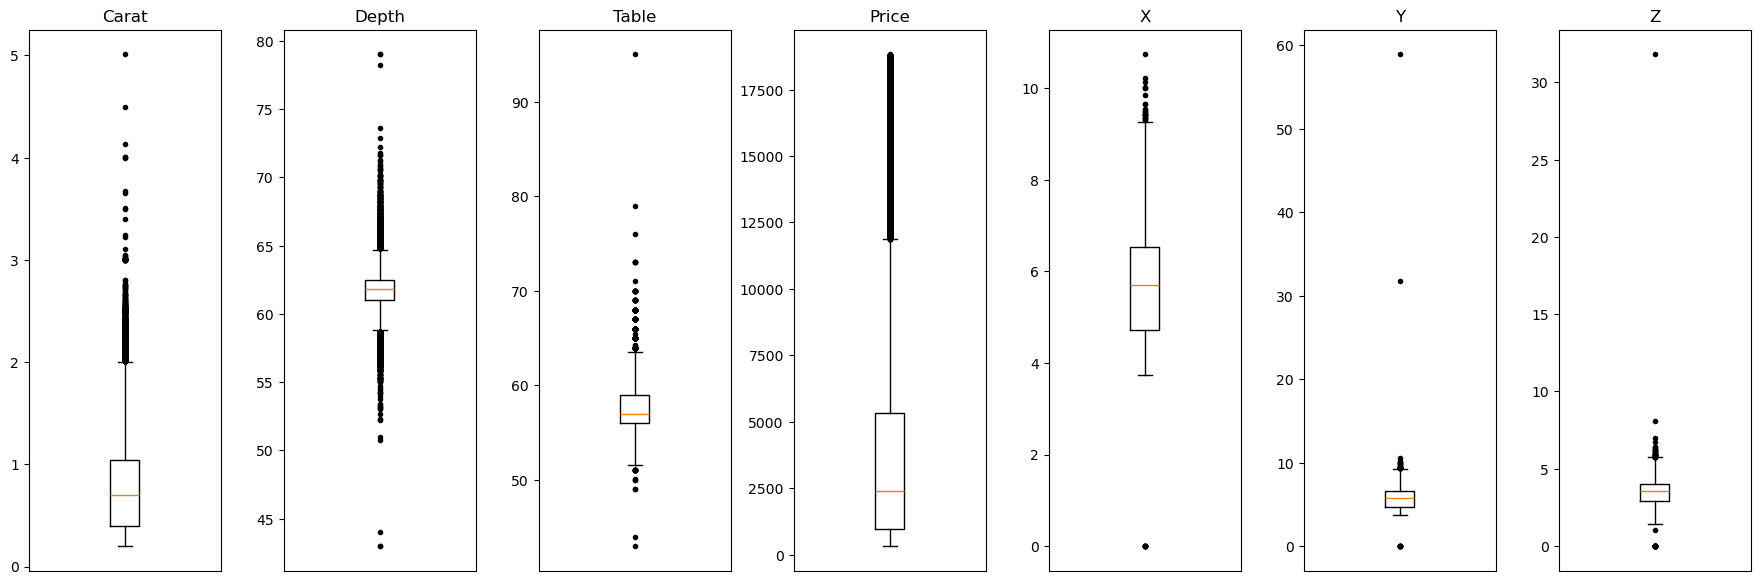

In [51]:
import matplotlib.pyplot as plt

# List of numerical columns from your dataset
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Create subplots: 1 row and 7 columns (one for each numerical feature)
fig, axes = plt.subplots(1, 7, figsize=(18, 6))  # Removed 'sharey=True' to give each plot its own y-axis

# Adjust the layout to avoid overlap
fig.tight_layout()

# Create box plots for each numerical column and adjust their appearance
for ax, col in zip(axes, numerical_columns):
    ax.boxplot(data[col], sym="k.")  # sym="k." uses black dots for outliers
    ax.set_title(col.capitalize())  # Set the title to the column name
    ax.set_xticks([])  # Remove x-tick labels for a cleaner look

# Display the plots
plt.show()


### Encoding categorial values

In [52]:
data['cut_code'] = data['cut'].astype('category').cat.codes
data['color_code'] = data['color'].astype('category').cat.codes
data['clarity_code'] = data['clarity'].astype('category').cat.codes

In [53]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_code,color_code,clarity_code
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3


#### Standardize the values

In [54]:
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting the columns for standardization
numerical_features = ['carat', 'cut_code', 'color_code', 'clarity_code', 'depth', 'table', 'price', 'x', 'y', 'z']

# Initializing the StandardScaler
scaler = StandardScaler()

# Standardizing the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows to confirm standardization
print(data[numerical_features].head())


      carat  cut_code  color_code  clarity_code     depth     table     price  \
0 -1.198168 -0.538099   -0.937163     -0.484264 -0.174092 -1.099672 -0.904095   
1 -1.240361  0.434949   -0.937163     -1.064117 -1.360738  1.585529 -0.904095   
2 -1.198168 -1.511147   -0.937163      0.095589 -3.385019  3.375663 -0.903844   
3 -1.071587  0.434949    1.414272      0.675442  0.454133  0.242928 -0.902090   
4 -1.029394 -1.511147    2.002131     -0.484264  1.082358  0.242928 -0.901839   

          x         y         z  
0 -1.587837 -1.536196 -1.571129  
1 -1.641325 -1.658774 -1.741175  
2 -1.498691 -1.457395 -1.741175  
3 -1.364971 -1.317305 -1.287720  
4 -1.240167 -1.212238 -1.117674  


In [55]:
# Manualelt til thomas i stedet 
# Calculate the mean and standard deviation for each numerical feature
diamonds_data = pd.read_csv('../Data/diamonds.csv')

numerical_features1 = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

means = diamonds_data[numerical_features1].mean()
stds = diamonds_data[numerical_features1].std()

# Display the means and standard deviations
print("Means:\n", means)
print("\nStandard Deviations:\n", stds)

# Manually standardizing the numerical features
diamonds_data_standardized = diamonds_data[numerical_features1].copy()

for column in numerical_features1:
    diamonds_data_standardized[column] = (diamonds_data[column] - means[column]) / stds[column]

# Display the first few rows of the manually standardized data
print(diamonds_data_standardized.head())

Means:
 carat       0.797940
depth      61.749405
table      57.457184
price    3932.799722
x           5.731157
y           5.734526
z           3.538734
dtype: float64

Standard Deviations:
 carat       0.474011
depth       1.432621
table       2.234491
price    3989.439738
x           1.121761
y           1.142135
z           0.705699
dtype: float64
      carat     depth     table     price         x         y         z
0 -1.198157 -0.174090 -1.099662 -0.904087 -1.587823 -1.536181 -1.571115
1 -1.240350 -1.360726  1.585514 -0.904087 -1.641310 -1.658759 -1.741159
2 -1.198157 -3.384987  3.375631 -0.903836 -1.498677 -1.457382 -1.741159
3 -1.071577  0.454129  0.242926 -0.902081 -1.364959 -1.317293 -1.287708
4 -1.029384  1.082348  0.242926 -0.901831 -1.240155 -1.212227 -1.117663


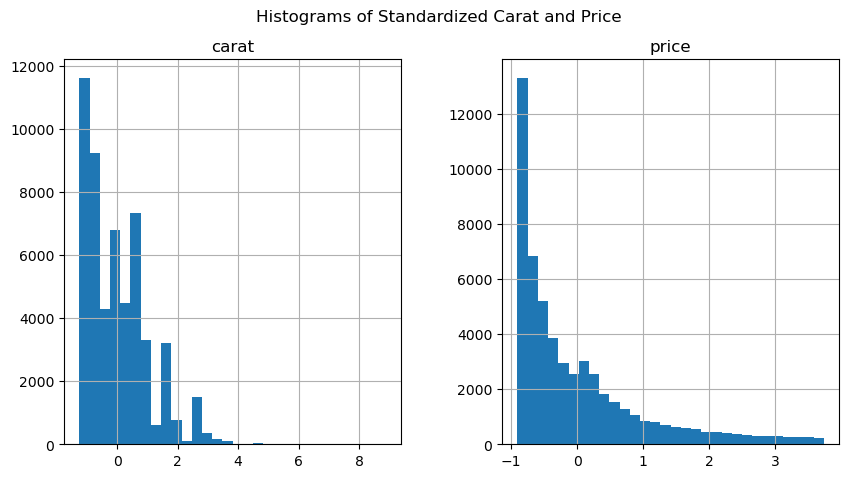

In [56]:
# Histograms for 'carat' and 'price' after standardization
data[['carat', 'price']].hist(bins=30, figsize=(10, 5))
plt.suptitle('Histograms of Standardized Carat and Price')
plt.show()


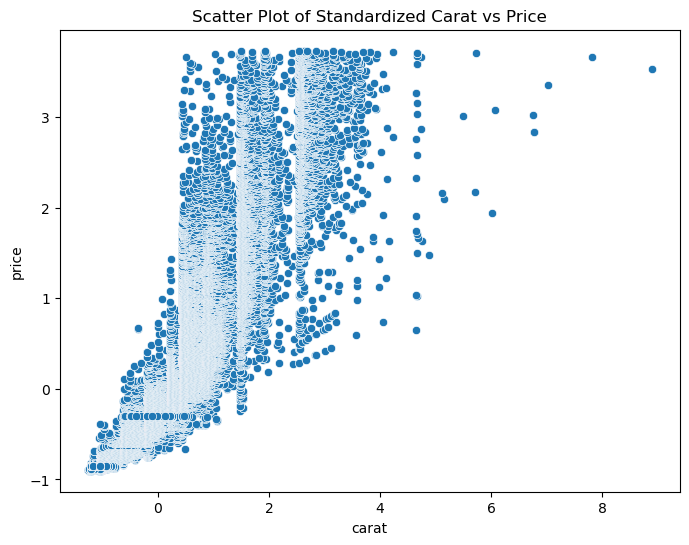

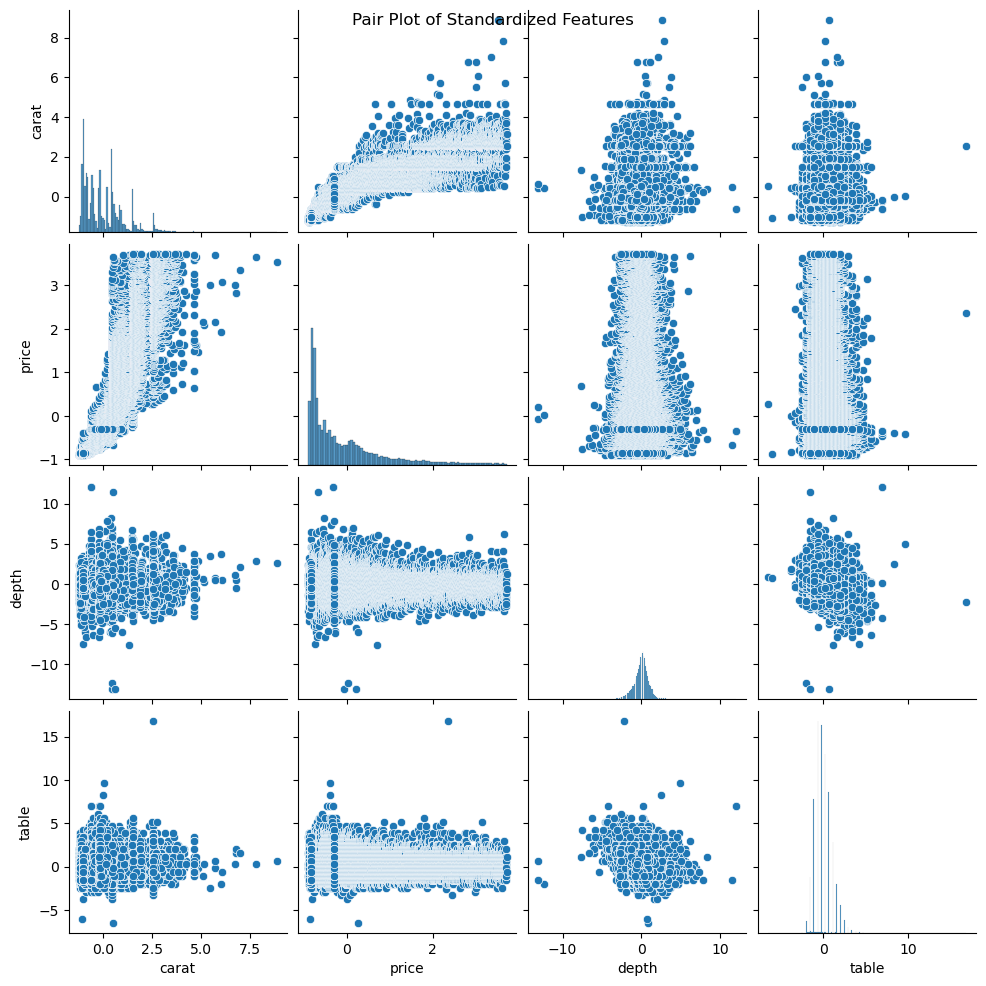

In [57]:
# Scatter plot between carat and price after standardization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='carat', y='price', data=data)
plt.title('Scatter Plot of Standardized Carat vs Price')
plt.show()

# Pair plot for selected standardized features
sns.pairplot(data[['carat', 'price', 'depth', 'table']])
plt.suptitle('Pair Plot of Standardized Features')
plt.show()


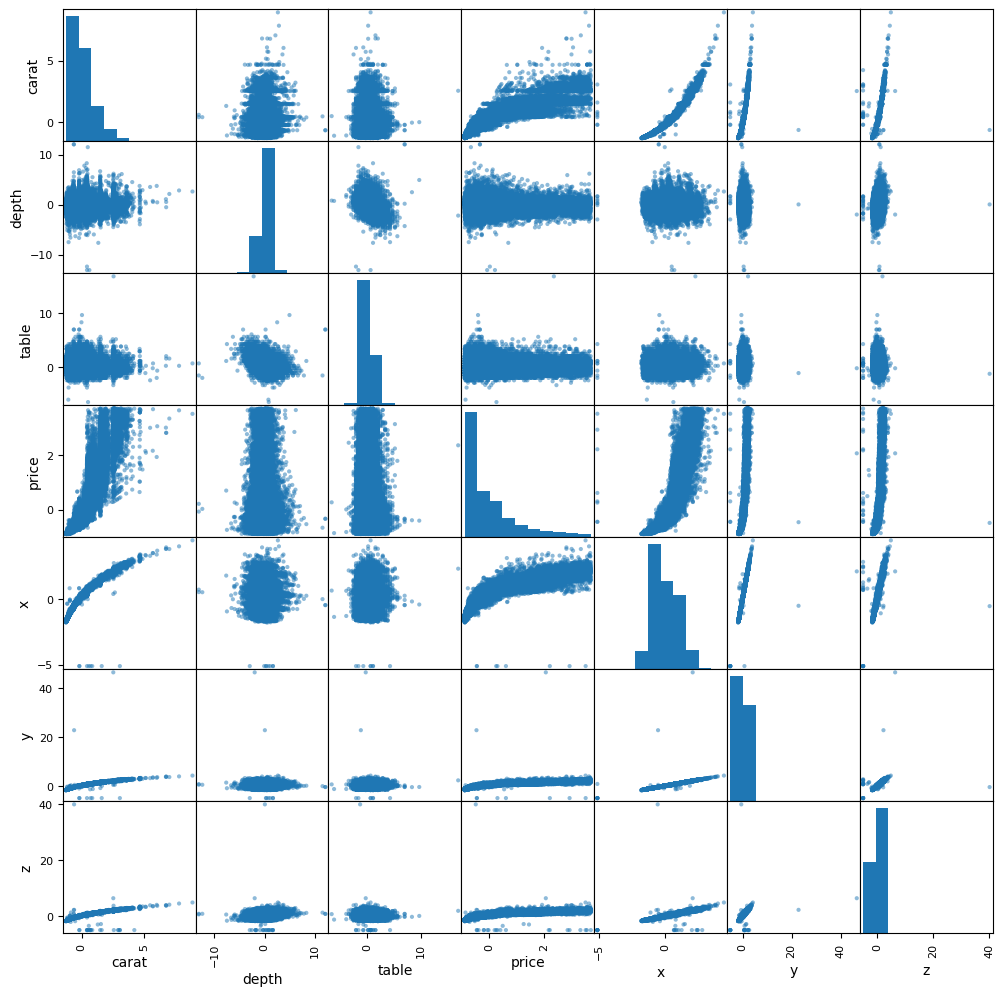

In [58]:
from pandas.plotting import scatter_matrix

# Create the scatter matrix plot
scatter_matrix(data[numerical_columns], figsize=(12, 12))
plt.show()

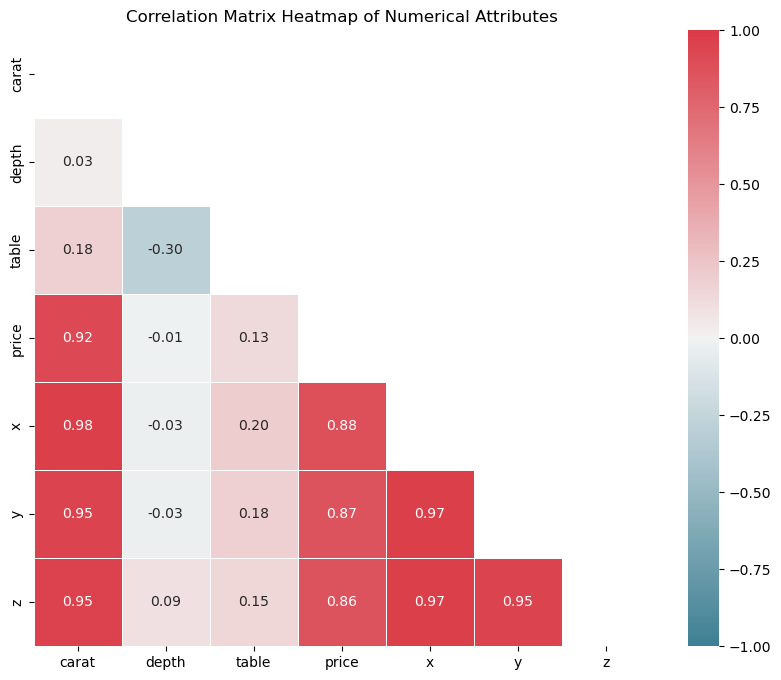

In [59]:
import seaborn as sns
import numpy as np

# Compute the correlation matrix
corr_matrix = data[numerical_columns].corr()
# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Generate a mask for the upper triangle (optional)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Generate a custom diverging colormap (optional)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap=cmap, 
    vmax=1, 
    vmin=-1, 
    center=0,
    annot=True,     # Annotate cells with correlation coefficients
    fmt=".2f",      # Format annotations to two decimal places
    square=True, 
    linewidths=.5
)

# Set the title
plt.title('Correlation Matrix Heatmap of Numerical Attributes')

# Show the plot
plt.show()


### PCA

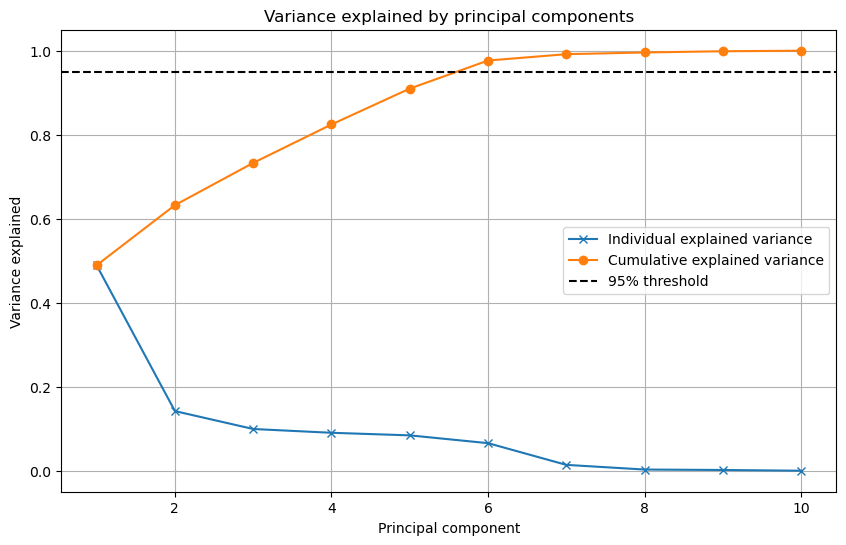

Number of components needed for 95% variance: 6


,Principal Component,Variance Explained,Cumulative Variance Explained
0,PC1,0.489738,0.489738
1,PC2,0.143029,0.632767
2,PC3,0.100440,0.733207
3,PC4,0.091433,0.824640
4,PC5,0.085296,0.909936
5,PC6,0.066747,0.976683
6,PC7,0.015111,0.991794
7,PC8,0.004022,0.995816
8,PC9,0.002971,0.998786
9,PC10,0.001214,1.000000


In [60]:
from scipy.linalg import svd

# Step 4: Perform PCA using SVD
U, S, Vt = svd(data[numerical_features], full_matrices=False)

# Step 5: Compute the variance explained by each principal component
rho = (S ** 2) / np.sum(S ** 2)

# Step 6: Plot the variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rho) + 1), rho, 'x-', label='Individual explained variance')
plt.plot(range(1, len(rho) + 1), np.cumsum(rho), 'o-', label='Cumulative explained variance')
plt.axhline(y=0.95, color='k', linestyle='--', label='95% threshold')
plt.title('Variance explained by principal components')
plt.xlabel('Principal component')
plt.ylabel('Variance explained')
plt.legend()
plt.grid(True)
plt.show()

# Number of components needed for 95% variance explained
num_components_for_95 = np.argmax(np.cumsum(rho) >= 0.95) + 1
print(f"Number of components needed for 95% variance: {num_components_for_95}")


# Table to display the variance explained and cumulative variance
# Step 7: Create a DataFrame to display the variance explained and cumulative variance
variance_data = {
    'Principal Component': [f'PC{i+1}' for i in range(len(rho))],
    'Variance Explained': rho,
    'Cumulative Variance Explained': np.cumsum(rho)
}

# Create the DataFrame
variance_df = pd.DataFrame(variance_data)

# display the entire table
display(variance_df)

In [61]:
# Principal directions (Vt contains the directions of the PCs)
print("Principal directions (Vt):\n", Vt)

# To make it more interpretable, let's create a DataFrame to display how each feature contributes to each PC
pc_df = pd.DataFrame(Vt.T, index=numerical_features, columns=[f'PC{i+1}' for i in range(Vt.shape[0])])
pc_df



Principal directions (Vt):
 [[ 4.46209488e-01  1.50184818e-02  1.44177418e-01 -1.11055175e-01
   1.63741103e-03  9.84139603e-02  4.13609771e-01  4.46611607e-01
   4.40561379e-01  4.39583747e-01]
 [-2.73581062e-02  4.91886912e-01 -9.93569011e-02  5.01367483e-02
  -6.47168409e-01  5.66018325e-01 -4.88709128e-03  5.03230710e-03
   6.34848869e-03 -7.49673815e-02]
 [-2.44460394e-02 -2.14655746e-01 -3.14522248e-01 -8.77615613e-01
   3.87980484e-02  2.51040488e-01 -1.39979914e-01 -2.05272994e-03
  -8.12484906e-03 -8.21187257e-04]
 [ 4.17925549e-02 -1.23360317e-01 -9.11678839e-01  2.82586440e-01
  -5.22801940e-02 -1.28212899e-01  2.09749080e-01  5.40108279e-02
   5.79873602e-02  5.07549661e-02]
 [-4.29709757e-03 -8.30574139e-01  1.50422607e-01  2.38769368e-01
  -3.21346754e-01  3.54520627e-01 -1.39777677e-02  9.96695956e-03
   3.68857035e-03 -3.51201868e-02]
 [-2.12145823e-03 -7.89469866e-02  7.98737080e-02 -2.37713789e-01
  -6.79755577e-01 -6.79849422e-01  2.12383851e-02  4.04875706e-02
   5.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
carat,0.446209,-0.027358,-0.024446,0.041793,-0.004297,-0.002121,-0.113518,0.086042,0.752555,0.459513
cut_code,0.015018,0.491887,-0.214656,-0.123360,-0.830574,-0.078947,0.019281,0.002091,0.007787,-0.002011
color_code,0.144177,-0.099357,-0.314522,-0.911679,0.150423,0.079874,-0.086491,-0.006140,-0.049274,-0.017478
clarity_code,-0.111055,0.050137,-0.877616,0.282586,0.238769,-0.237714,0.140888,0.006009,0.040439,0.007021
depth,0.001637,-0.647168,0.038798,-0.052280,-0.321347,-0.679756,-0.022321,-0.088465,0.016186,-0.054902
table,0.098414,0.566018,0.251040,-0.128213,0.354521,-0.679849,-0.042826,-0.008978,-0.025960,-0.003056
price,0.413610,-0.004887,-0.139980,0.209749,-0.013978,0.021238,-0.807892,-0.043721,-0.315094,-0.103839
x,0.446612,0.005032,-0.002053,0.054011,0.009967,0.040488,0.243811,0.082373,0.257199,-0.814538
y,0.440561,0.006348,-0.008125,0.057987,0.003689,0.053213,0.354659,-0.757057,-0.246348,0.199966
z,0.439584,-0.074967,-0.000821,0.050755,-0.035120,-0.041115,0.345202,0.634649,-0.449975,0.266878


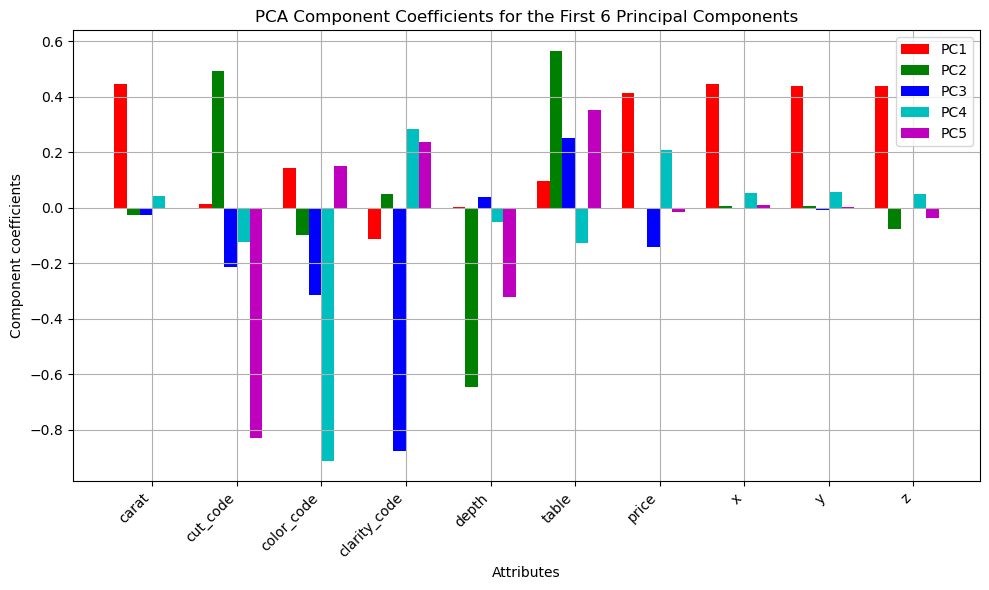

PC2 coefficients:
 [-0.02735811  0.49188691 -0.0993569   0.05013675 -0.64716841  0.56601832
 -0.00488709  0.00503231  0.00634849 -0.07496738]


In [62]:
# Transpose Vt to get the principal component directions (V)
V = Vt.T

# Step 6: Select the first 6 principal components
pcs = [0, 1, 2, 3, 4]  # First 6 principal components

# Prepare for plotting
M = data[numerical_features].shape[1]  # Number of features
attribute_names = numerical_features  # List of feature names
legend_strs = [f"PC{e+1}" for e in pcs]  # Labels for the PCs
bw = 0.15  # Bar width
r = np.arange(1, M + 1)  # X positions for the bars
colors = ['r', 'g', 'b', 'c', 'm', 'y']  # Colors for each PC

# Plot the coefficients for the first 6 principal components
plt.figure(figsize=(10, 6))
for i, pc in enumerate(pcs):
    plt.bar(r + i * bw, V[:, pc], width=bw, color=colors[i], label=f"PC{pc+1}")

# Add labels, grid, and legend
plt.xticks(r + bw * 2.5, attribute_names, rotation=45, ha="right")
plt.xlabel("Attributes")
plt.ylabel("Component coefficients")
plt.title("PCA Component Coefficients for the First 6 Principal Components")
plt.legend(legend_strs)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# (Optional) Print the coefficients for a specific principal component, e.g., PC2
print("PC2 coefficients:\n", V[:, 1])

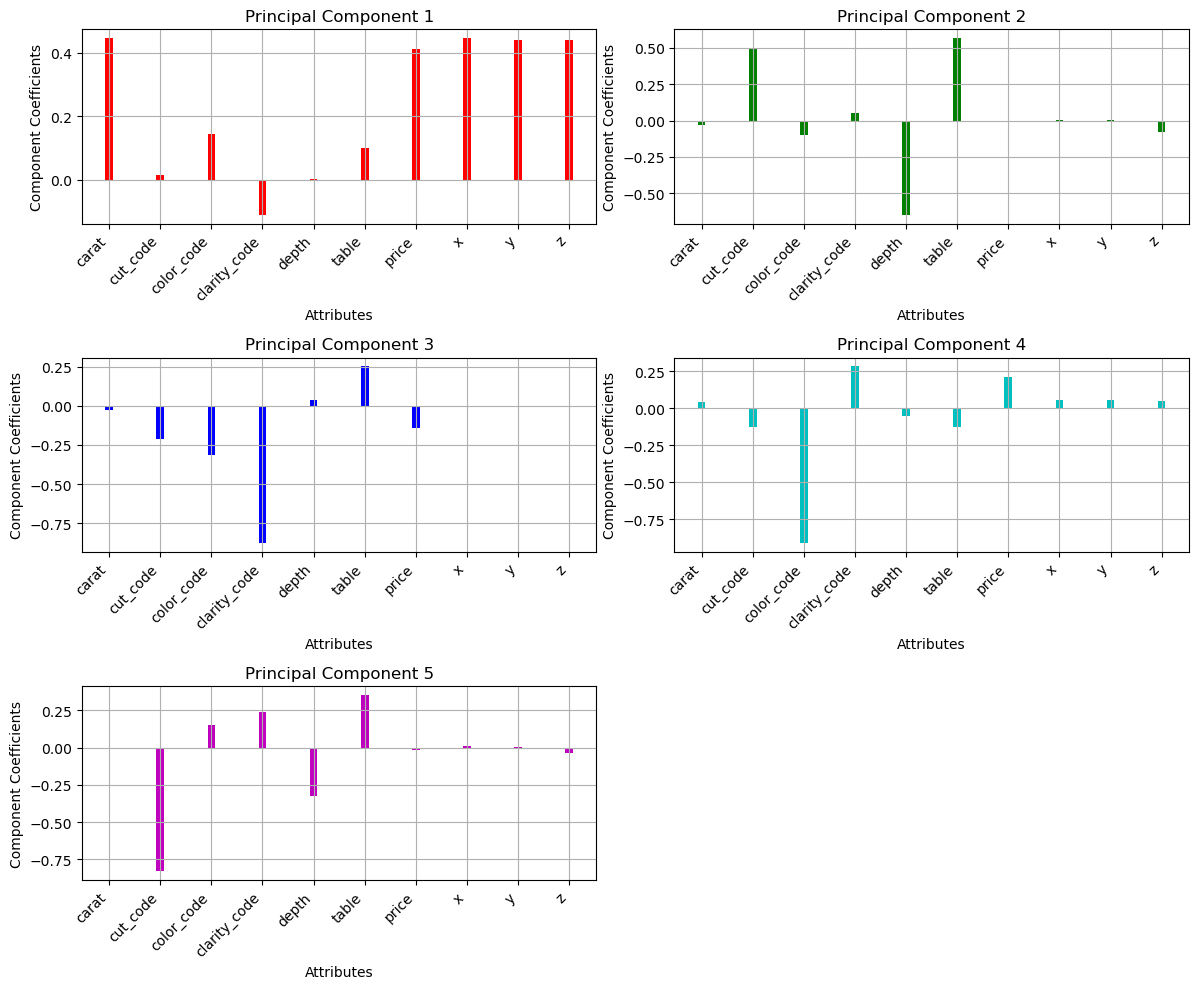

In [63]:
# Plot the coefficients for the first 6 principal components in subplots
plt.figure(figsize=(12, 10))

for i, pc in enumerate(pcs):
    plt.subplot(3, 2, i + 1)  # 3 rows, 2 columns layout for subplots
    plt.bar(r, V[:, pc], color=colors[i], width=bw)
    plt.xticks(r, attribute_names, rotation=45, ha="right")
    plt.title(f"Principal Component {pc+1}")
    plt.xlabel("Attributes")
    plt.ylabel("Component Coefficients")
    plt.grid(True)

plt.tight_layout()
plt.show()


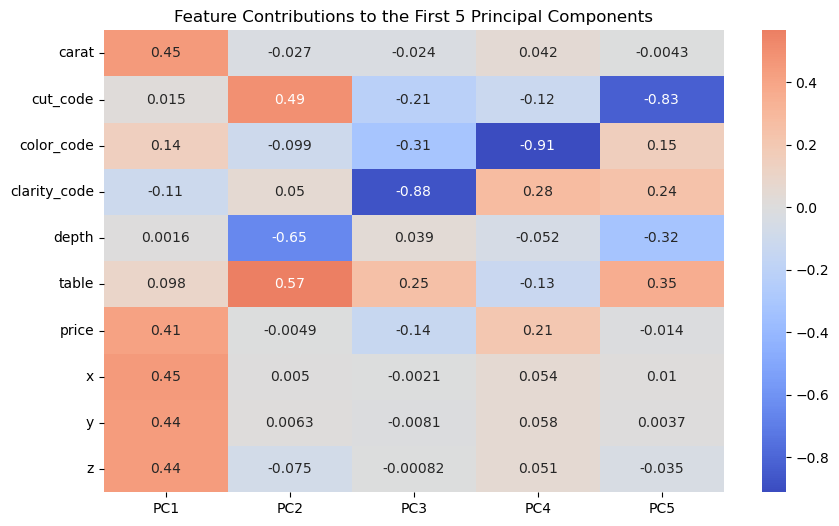

In [64]:
# Create a DataFrame for easy plotting with Seaborn
pc_contributions = pd.DataFrame(V[:, pcs], index=attribute_names, columns=[f"PC{i+1}" for i in pcs])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pc_contributions, annot=True, cmap="coolwarm", center=0)
plt.title("Feature Contributions to the First 5 Principal Components")
plt.show()

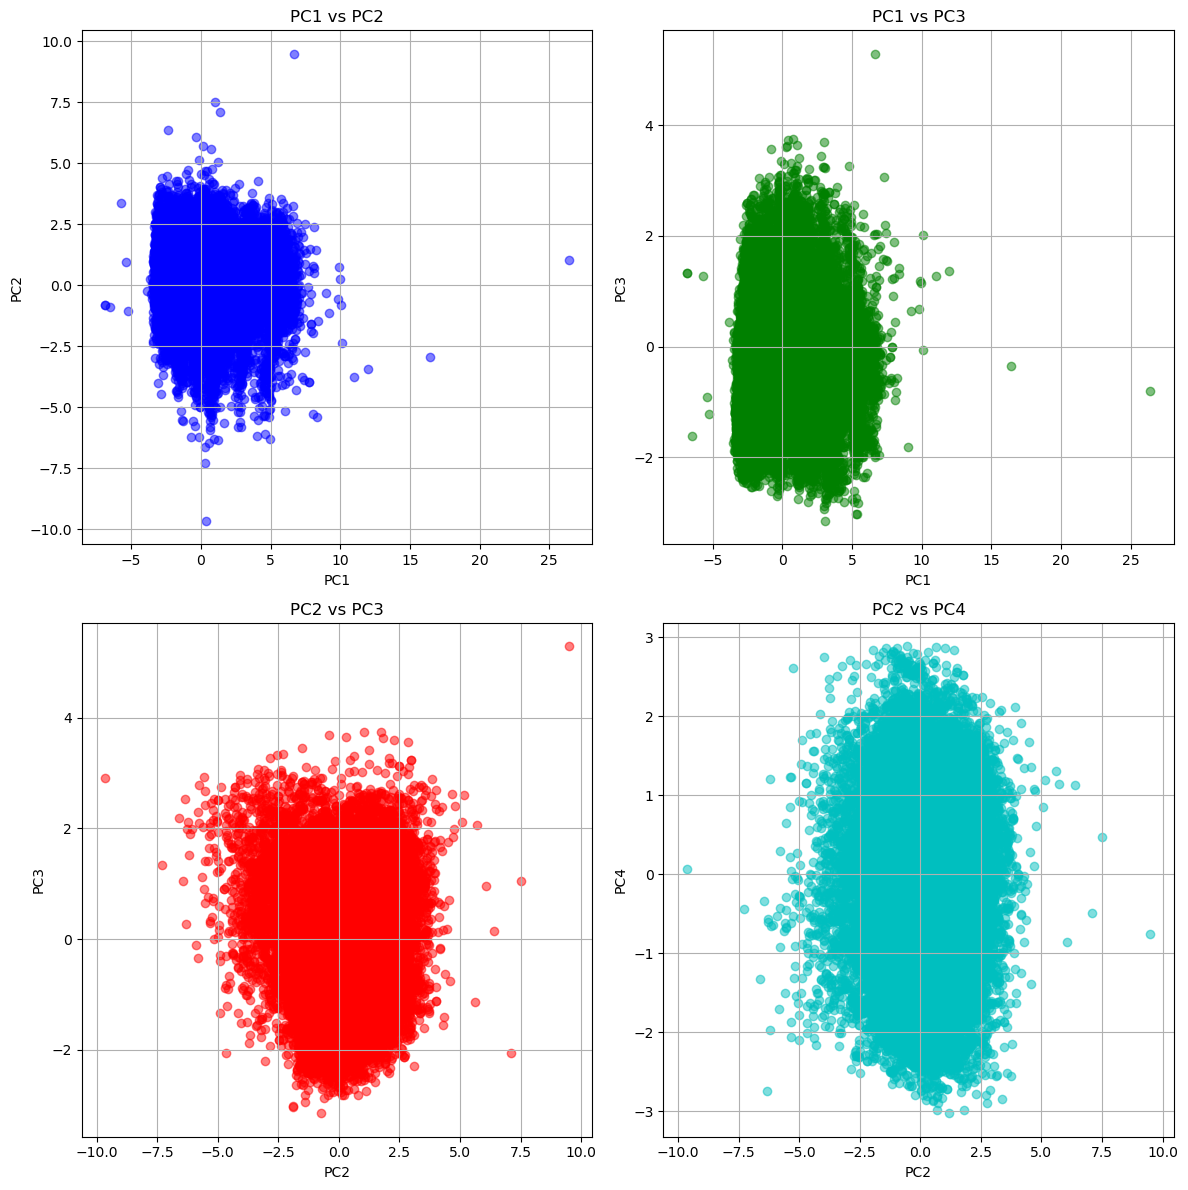

In [65]:
# Step 1: Project the data onto the first few principal components
Z = np.dot(data[numerical_features] - np.mean(data[numerical_features], axis=0), V[:, pcs])

# Step 2: Create scatter plots for different principal component pairs
plt.figure(figsize=(12, 12))

# PC1 vs PC2
plt.subplot(2, 2, 1)
plt.scatter(Z[:, 0], Z[:, 1], alpha=0.5, c='b')  # PC1 vs PC2
plt.title("PC1 vs PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)

# PC1 vs PC3
plt.subplot(2, 2, 2)
plt.scatter(Z[:, 0], Z[:, 2], alpha=0.5, c='g')  # PC1 vs PC3
plt.title("PC1 vs PC3")
plt.xlabel("PC1")
plt.ylabel("PC3")
plt.grid(True)

# PC2 vs PC3
plt.subplot(2, 2, 3)
plt.scatter(Z[:, 1], Z[:, 2], alpha=0.5, c='r')  # PC2 vs PC3
plt.title("PC2 vs PC3")
plt.xlabel("PC2")
plt.ylabel("PC3")
plt.grid(True)

# PC2 vs PC4
plt.subplot(2, 2, 4)
plt.scatter(Z[:, 1], Z[:, 3], alpha=0.5, c='c')  # PC2 vs PC4
plt.title("PC2 vs PC4")
plt.xlabel("PC2")
plt.ylabel("PC4")
plt.grid(True)

plt.tight_layout()
plt.show()

/var/folders/tj/czw2xwdj6jv1gvfb9pcj33sh0000gn/T/ipykernel_42831/1208967932.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set1', len(cut_categories)).colors  # Adjust colormap as needed


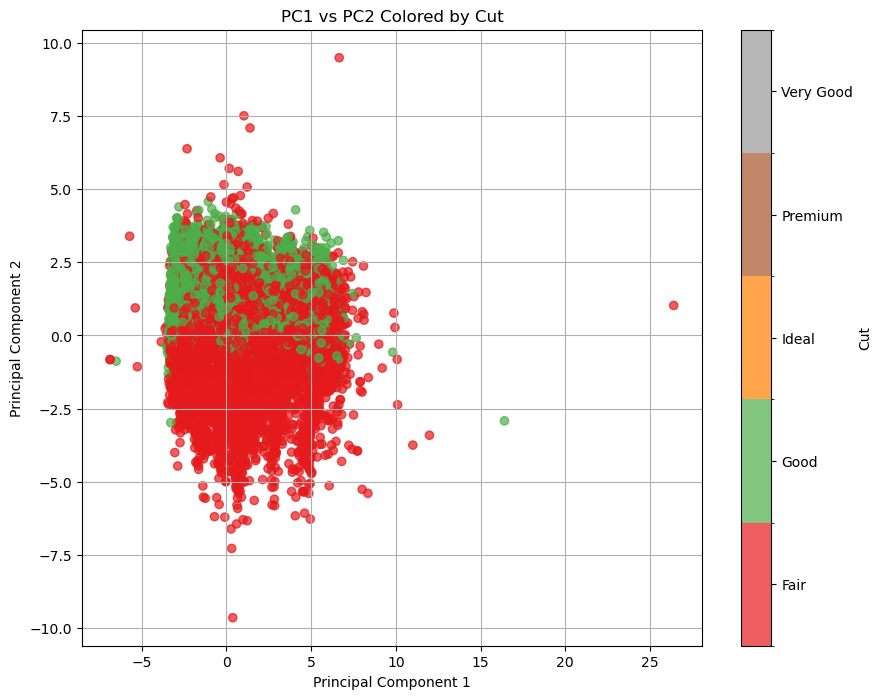

/var/folders/tj/czw2xwdj6jv1gvfb9pcj33sh0000gn/T/ipykernel_42831/1208967932.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('Set2', len(color_categories)).colors


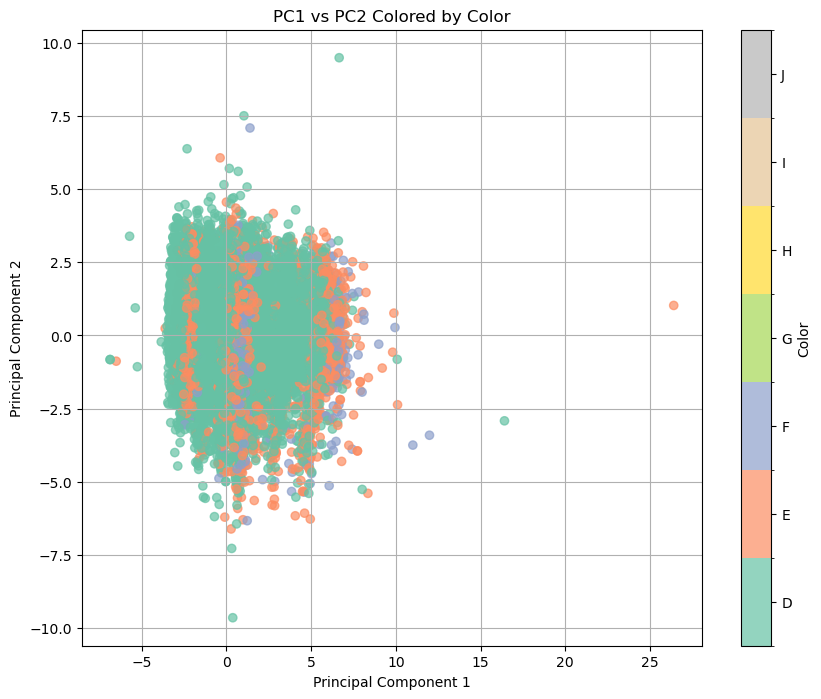

/var/folders/tj/czw2xwdj6jv1gvfb9pcj33sh0000gn/T/ipykernel_42831/1208967932.py:61: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(clarity_categories)).colors


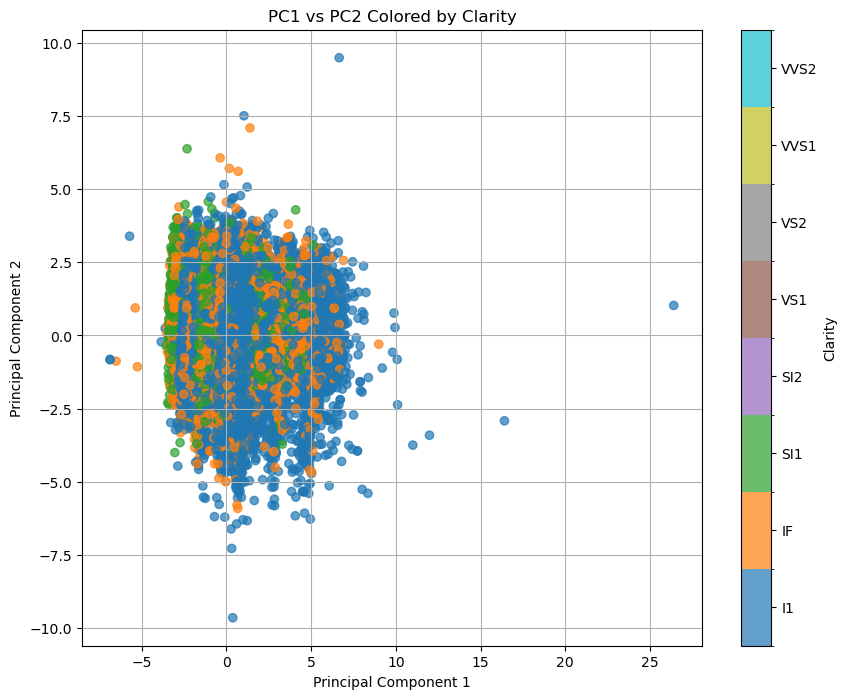

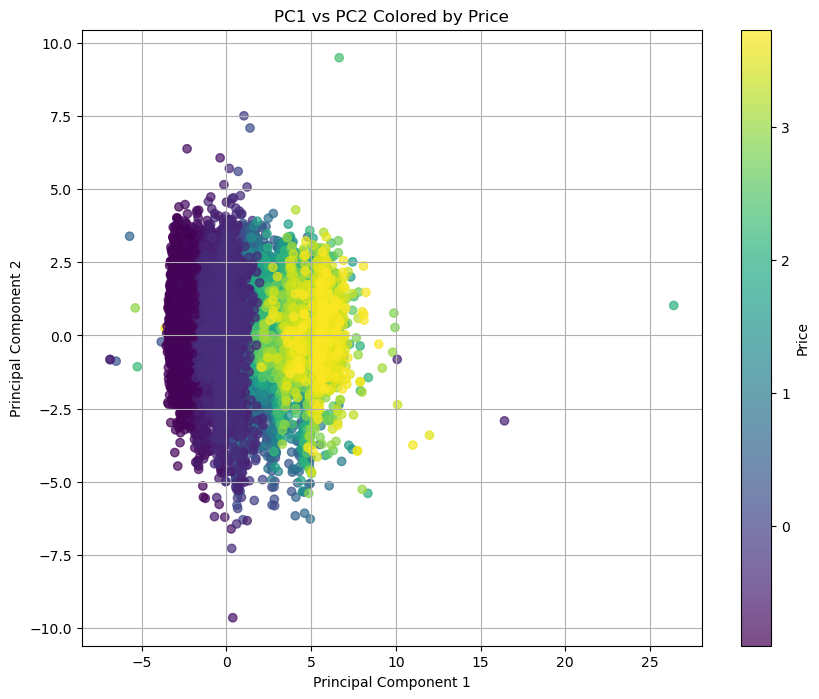

In [69]:
from matplotlib.colors import ListedColormap, BoundaryNorm

# Get the unique codes and corresponding categories
cut_categories = data['cut'].astype('category').cat.categories
cut_codes = data['cut_code']

# Create a color palette
colors = plt.cm.get_cmap('Set1', len(cut_categories)).colors  # Adjust colormap as needed

# Create a colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, len(cut_categories)+0.5), len(cut_categories))

# Create the scatter plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=cut_codes, cmap=cmap, norm=norm, alpha=0.7)
plt.title("PC1 vs PC2 Colored by Cut")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Create a colorbar with the category labels
cbar = plt.colorbar(scatter, ticks=range(len(cut_categories)))
cbar.ax.set_yticklabels(cut_categories)
cbar.set_label('Cut')

plt.grid(True)
plt.show()

# Get the unique codes and categories
color_categories = data['color'].astype('category').cat.categories
color_codes = data['color_code']

# Create color palette
colors = plt.cm.get_cmap('Set2', len(color_categories)).colors

# Colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, len(color_categories)+0.5), len(color_categories))

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=color_codes, cmap=cmap, norm=norm, alpha=0.7)
plt.title("PC1 vs PC2 Colored by Color")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Colorbar
cbar = plt.colorbar(scatter, ticks=range(len(color_categories)))
cbar.ax.set_yticklabels(color_categories)
cbar.set_label('Color')

plt.grid(True)
plt.show()


# Get the unique codes and categories
clarity_categories = data['clarity'].astype('category').cat.categories
clarity_codes = data['clarity_code']

# Create color palette
colors = plt.cm.get_cmap('tab10', len(clarity_categories)).colors

# Colormap and norm
cmap = ListedColormap(colors)
norm = BoundaryNorm(np.arange(-0.5, len(clarity_categories)+0.5), len(clarity_categories))

# Plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=clarity_codes, cmap=cmap, norm=norm, alpha=0.7)
plt.title("PC1 vs PC2 Colored by Clarity")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Colorbar
cbar = plt.colorbar(scatter, ticks=range(len(clarity_categories)))
cbar.ax.set_yticklabels(clarity_categories)
cbar.set_label('Clarity')

plt.grid(True)
plt.show()

plt.figure(figsize=(10, 8))
scatter = plt.scatter(Z[:, 0], Z[:, 1], c=data['price'], cmap='viridis', alpha=0.7)
plt.title("PC1 vs PC2 Colored by Price")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
cbar = plt.colorbar(scatter)
cbar.set_label('Price')
plt.grid(True)
plt.show()


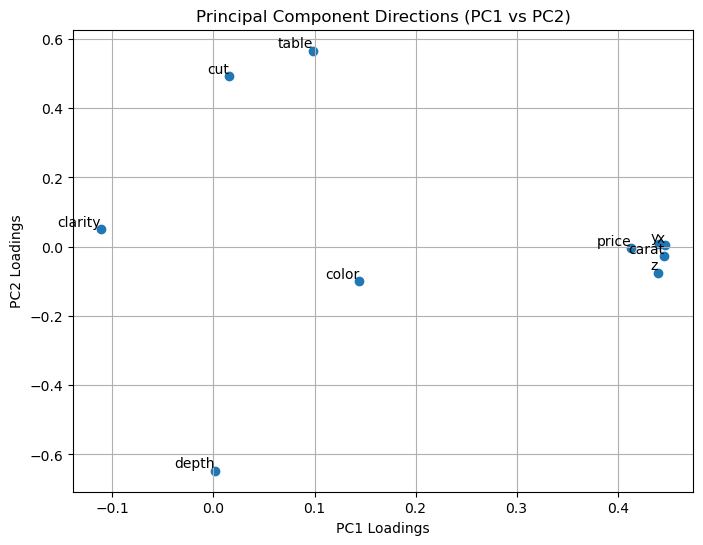

In [23]:
# Get the loadings (directions) for PC1 and PC2 from the V matrix
pc1_loadings = V[:, 0]  # PC1 loadings (1st column of V)
pc2_loadings = V[:, 1]  # PC2 loadings (2nd column of V)

# Plot PC1 loadings vs. PC2 loadings
plt.figure(figsize=(8, 6))

# Create scatter plot for loadings
plt.scatter(pc1_loadings, pc2_loadings)

# Add labels for each feature
for i, feature in enumerate(attribute_names):
    plt.text(pc1_loadings[i], pc2_loadings[i], feature, ha='right', va='bottom', fontsize=10)

# Add axis labels and title
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Principal Component Directions (PC1 vs PC2)')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()

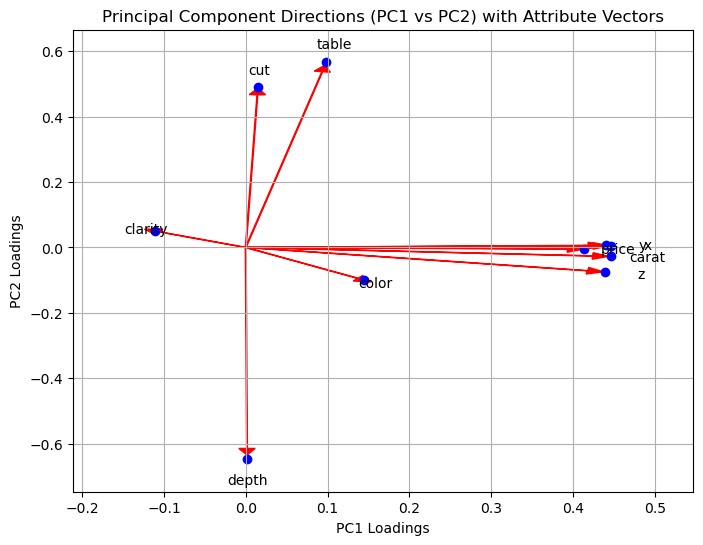

In [24]:
# Factor to scale the arrows slightly smaller so they don't overlap with the dots
scaling_factor = 0.95

# Plot PC1 loadings vs. PC2 loadings
plt.figure(figsize=(8, 6))

# Add vectors (arrows) for each attribute from the origin (0, 0) to slightly shorter than (PC1 loading, PC2 loading)
for i, feature in enumerate(attribute_names):
    # Draw the arrows (scale them by the scaling_factor)
    plt.arrow(0, 0, pc1_loadings[i] * scaling_factor, pc2_loadings[i] * scaling_factor, 
              head_width=0.02, head_length=0.02, fc='r', ec='r')

    # Draw the points (dots) where the arrows would end
    plt.scatter(pc1_loadings[i], pc2_loadings[i], color='b')  # Use blue color for dots

    # Add text labels for each feature
    plt.text(pc1_loadings[i] * 1.1, pc2_loadings[i] * 1.1, feature, ha='center', va='center', fontsize=10)

# Set the limits for the plot to make sure arrows fit well
plt.xlim(min(pc1_loadings) - 0.1, max(pc1_loadings) + 0.1)
plt.ylim(min(pc2_loadings) - 0.1, max(pc2_loadings) + 0.1)

# Add axis labels and title
plt.xlabel('PC1 Loadings')
plt.ylabel('PC2 Loadings')
plt.title('Principal Component Directions (PC1 vs PC2) with Attribute Vectors')

# Add grid for better readability
plt.grid(True)

# Show the plot
plt.show()